# Large sample simulation

## Scalable method

Should run with qubits < 300

In [1]:
from qvtsim.scalable_class import ScalableEstimate
import numpy as np

scalable = ScalableEstimate(
    qubit_list=np.arange(2, 7),
    optimization_lvl='high',
    error_name='TQ Dep',
    error_list=np.arange(0.001, 0.05, 0.005),
)
scalable.run('avg')

In [2]:
scalable.table('act')

,2,3,4,5,6
0.001,0.790950,0.844933,0.832443,0.846205,0.834694
0.006,0.782972,0.828360,0.800714,0.803008,0.768808
0.011,0.775570,0.813423,0.773796,0.767581,0.719332
0.016,0.768517,0.799537,0.750053,0.737299,0.680316
0.021,0.761727,0.786470,0.728778,0.710971,0.648909
0.026,0.755155,0.774097,0.709559,0.687877,0.623344
0.031,0.748779,0.762342,0.692119,0.667518,0.602401
0.036,0.742583,0.751156,0.676253,0.649517,0.585175
0.041,0.736558,0.740500,0.661798,0.633574,0.570967
0.046,0.730701,0.730349,0.648624,0.619442,0.559233


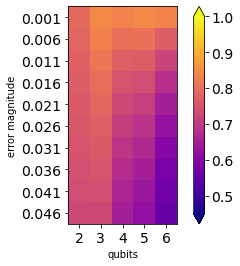

In [3]:
scalable.plot('act')

## Numerical simulation
Should run with < 10 qubits

In [4]:
from qvtsim.numerical_class import NumericalEstimate
import numpy as np

numeric = NumericalEstimate(
    qubit_list=np.arange(2, 7),
    optimization_lvl='high',
    error_name='TQ Dep',
    error_list=np.arange(0.001, 0.05, 0.005),
    ntrials=100
)
numeric.run()

finished n=2, time=0:00:17.185611
finished n=3, time=0:00:24.986091
finished n=4, time=0:00:52.866128
finished n=5, time=0:01:11.178580
finished n=6, time=0:02:05.912623


In [5]:
numeric.table('act')

,2,3,4,5,6
0.001,0.779570,0.852825,0.838737,0.846238,0.836684
0.006,0.772383,0.840884,0.807506,0.807931,0.768987
0.011,0.764055,0.826129,0.778745,0.774889,0.719250
0.016,0.756846,0.813957,0.756290,0.747573,0.679901
0.021,0.749897,0.802339,0.735840,0.723581,0.648687
0.026,0.743812,0.790956,0.717233,0.703011,0.624035
0.031,0.737099,0.781133,0.699491,0.684325,0.603533
0.036,0.732263,0.771254,0.684081,0.667312,0.587199
0.041,0.724426,0.761642,0.671097,0.652532,0.573118
0.046,0.716025,0.752065,0.658812,0.638998,0.561581


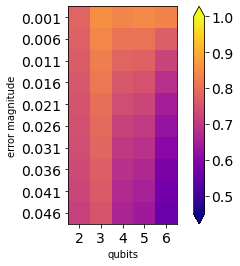

In [8]:
numeric.plot('act')

## Confidence interval comparison

In [9]:
from qvtsim.confidence_interval_funcs import analyze_confidence_intervals

success, lower, coverage = analyze_confidence_intervals(
    numeric.act_success,
    ns_list=[1, 10, 100],
    nc_list=[100, 200, 300],
    reps=100
)

In [10]:
coverage['bootstrap'][2, 0.001]

{(100, 1): 0.93,
 (100, 10): 0.99,
 (100, 100): 0.95,
 (200, 1): 0.96,
 (200, 10): 0.99,
 (200, 100): 0.99,
 (300, 1): 0.99,
 (300, 10): 0.99,
 (300, 100): 1.0}

In [11]:
coverage['original'][2, 0.001]

{(100, 1): 0.96,
 (100, 10): 1.0,
 (100, 100): 1.0,
 (200, 1): 0.98,
 (200, 10): 1.0,
 (200, 100): 1.0,
 (300, 1): 0.99,
 (300, 10): 1.0,
 (300, 100): 1.0}

## Estimate passing error magnitudes

QVEstimate heavy output frequencies must be above and below the specified threshold.

In [12]:
from qvtsim.utils import passing_error_estimate

scalable_estimate = passing_error_estimate(scalable, 6, threshold=2/3)
numeric_estimate = passing_error_estimate(numeric, 6, threshold=2/3)

print(f'Error magnitude threhsold (scalable) = {scalable_estimate: .6f}')
print(f'Error magnitude threhsold (numeric)  = {numeric_estimate: .6f}')

Error magnitude threhsold (scalable) =  0.018044
Error magnitude threhsold (numeric)  =  0.017974
